# MVP Comunidad Valenciana

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

pd.options.display.max_columns = None

%matplotlib inline

In [9]:
data = pd.read_excel('../data/portfolio_com_valencia.xlsx')
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Account Balance,Monitoring Status Date,Monitoring Status,Precio Contado,Precio Financiado,Quejas
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,0.0,2015-01-14,0,435,360.0,0
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,0.0,2015-01-13,0,494,360.0,0
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,0.0,2015-01-13,0,494,0.0,0
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,0.0,2020-01-31,1,554,0.0,1
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,0.0,2015-01-13,0,435,360.0,1


In [10]:
data.shape

(48110, 23)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48110 entries, 0 to 48109
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Installation Date       48110 non-null  datetime64[ns]
 1   Installation Number     48110 non-null  int64         
 2   Client Type             48110 non-null  object        
 3   Panel                   48110 non-null  object        
 4   Territorial             48110 non-null  object        
 5   Provincia               48110 non-null  object        
 6   Zip                     48110 non-null  int64         
 7   Gender                  48110 non-null  object        
 8   Nationality             48110 non-null  object        
 9   Country Of Birth        48110 non-null  object        
 10  Born Date               47886 non-null  datetime64[ns]
 11  Housing Type            48110 non-null  object        
 12  Labor Situation         48110 non-null  object

In [12]:
data.isnull().sum()

Installation Date           0
Installation Number         0
Client Type                 0
Panel                       0
Territorial                 0
Provincia                   0
Zip                         0
Gender                      0
Nationality                 0
Country Of Birth            0
Born Date                 224
Housing Type                0
Labor Situation             0
Marital Status              0
Income Amount               0
Number Pay                  0
Price List                  0
Account Balance             0
Monitoring Status Date      0
Monitoring Status           0
Precio Contado              0
Precio Financiado           0
Quejas                      0
dtype: int64

In [13]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Número de Filas:", df.shape[0])
    print("\nNúmero de Columnas:", df.shape[1])
    print("\nColumnas:\n")
    print(data.columns.tolist())
    print("\nValores nulos:", df.isnull().sum().values.sum())
    print("\nValores únicos:\n")
    print(df.nunique())

In [14]:
dataoveriew(data, 'Overiew of the dataset')

Overiew of the dataset:

Número de Filas: 48110

Número de Columnas: 23

Columnas:

['Installation Date', 'Installation Number', 'Client Type', 'Panel', 'Territorial', 'Provincia', 'Zip', 'Gender', 'Nationality', 'Country Of Birth', 'Born Date', 'Housing Type', 'Labor Situation', 'Marital Status', 'Income Amount', 'Number Pay', 'Price List', 'Account Balance', 'Monitoring Status Date', 'Monitoring Status', 'Precio Contado', 'Precio Financiado', 'Quejas']

Valores nulos: 224

Valores únicos:

Installation Date          2104
Installation Number       48098
Client Type                   2
Panel                         2
Territorial                   1
Provincia                     3
Zip                         620
Gender                        2
Nationality                  11
Country Of Birth            134
Born Date                 18863
Housing Type                  5
Labor Situation               8
Marital Status                6
Income Amount               443
Number Pay             

In [16]:
data['Quejas'] = data['Quejas'].replace(np.nan, 0).astype('int')
data['Installation Number'] = data['Installation Number'].astype('str')
data['Zip'] = data['Zip'].astype('str')
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Account Balance,Monitoring Status Date,Monitoring Status,Precio Contado,Precio Financiado,Quejas
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,0.0,2015-01-14,0,435,360.0,0
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,0.0,2015-01-13,0,494,360.0,0
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,0.0,2015-01-13,0,494,0.0,0
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,0.0,2020-01-31,1,554,0.0,1
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,0.0,2015-01-13,0,435,360.0,1


In [17]:
data.describe()

,Income Amount,Number Pay,Account Balance,Monitoring Status,Precio Contado,Precio Financiado,Quejas
count,4.811000e+04,48110.000000,48110.000000,48110.000000,48110.000000,48110.000000,48110.000000
mean,4.360571e+04,12.925525,205.681220,0.103180,621.516483,202.570418,0.313157
std,5.456444e+06,1.066713,177.950818,0.304197,369.264899,225.275731,0.938350
min,1.000000e+00,12.000000,-567.000000,0.000000,9.000000,0.000000,0.000000
25%,1.200000e+03,12.000000,0.000000,0.000000,494.000000,0.000000,0.000000
50%,1.500000e+03,12.000000,205.700000,0.000000,554.000000,108.000000,0.000000
75%,2.000000e+03,14.000000,363.000000,0.000000,675.000000,360.000000,0.000000
max,1.000000e+09,16.000000,2808.390000,1.000000,24150.000000,3840.000000,23.000000


In [12]:
# sns.set_style(style = 'darkgrid')

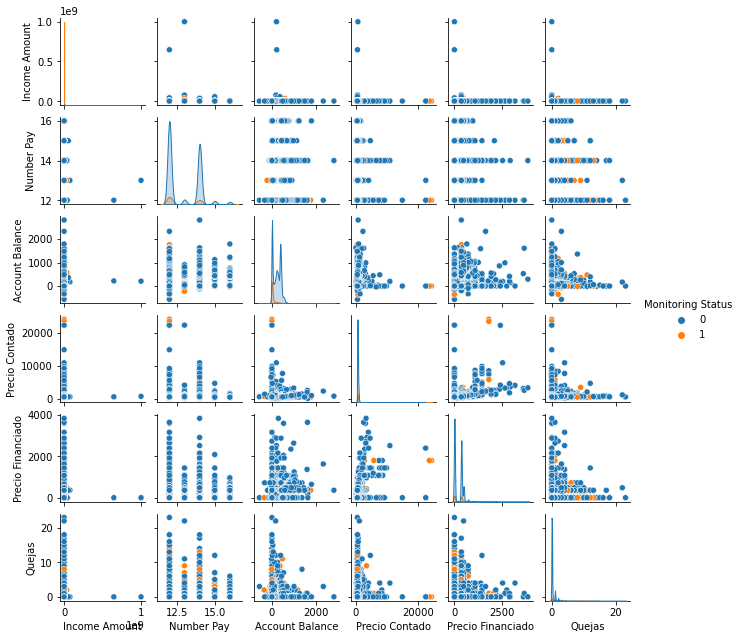

In [18]:
# Don´t do this!!!!

# sns.pairplot(data = data, diag_kind = 'kde', hue = 'Monitoring Status', height = 1.5);

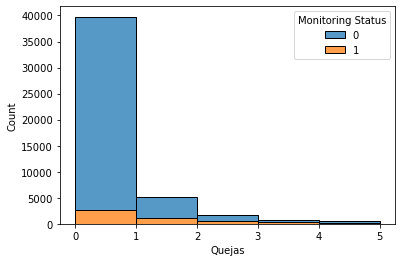

In [22]:
sns.histplot(data = data, x="Quejas", hue = 'Monitoring Status', multiple="stack",
             binwidth=1,  binrange = (0,5));

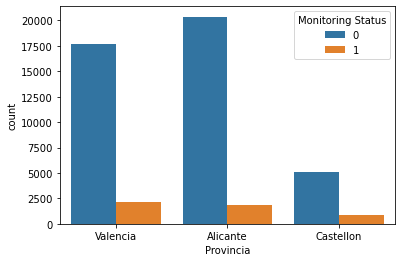

In [23]:
sns.countplot(x="Provincia", hue = 'Monitoring Status',data = data);

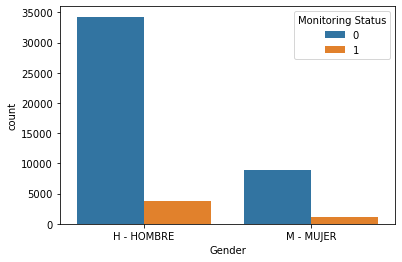

In [24]:
sns.countplot(x="Gender", hue = 'Monitoring Status',data = data);

In [25]:
data['Monitoring Status'] = data['Monitoring Status'].astype('str').str.strip()
data['Monitoring Status'] = data['Monitoring Status'].replace({'OP': 0, 'BAJA': 1}).astype(int)
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Account Balance,Monitoring Status Date,Monitoring Status,Precio Contado,Precio Financiado,Quejas
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,0.0,2015-01-14,0,435,360.0,0
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,0.0,2015-01-13,0,494,360.0,0
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,0.0,2015-01-13,0,494,0.0,0
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,0.0,2020-01-31,1,554,0.0,1
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,0.0,2015-01-13,0,435,360.0,1


In [26]:
corr = data.corr()
corr

,Income Amount,Number Pay,Account Balance,Monitoring Status,Precio Contado,Precio Financiado,Quejas
Income Amount,1.000000,-0.000996,0.000749,-0.002149,-0.000161,-0.005334,-0.002254
Number Pay,-0.000996,1.000000,0.065887,-0.042746,-0.020609,-0.079129,-0.017381
Account Balance,0.000749,0.065887,1.000000,-0.259465,0.002193,0.147185,-0.225325
Monitoring Status,-0.002149,-0.042746,-0.259465,1.000000,-0.022791,0.000026,0.229129
Precio Contado,-0.000161,-0.020609,0.002193,-0.022791,1.000000,0.224822,0.008932
Precio Financiado,-0.005334,-0.079129,0.147185,0.000026,0.224822,1.000000,-0.032537
Quejas,-0.002254,-0.017381,-0.225325,0.229129,0.008932,-0.032537,1.000000


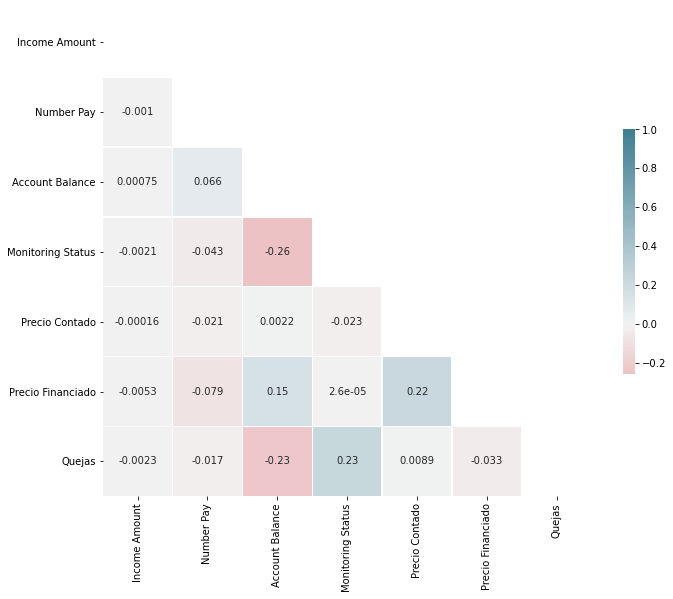

In [27]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Funciones

In [28]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

def evaluate(classifier, features, target):
    
    X_train, X_test, y_train, y_test = train_test_split(features, target)
    classifier.fit(X_train, y_train)

    predictions = classifier.predict(X_test)
    probabilities = classifier.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    auc = roc_auc_score(y_test, probabilities)
    fpr, tpr, threshold = roc_curve(y_test, probabilities)
    
    plt.plot(fpr, tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.gcf().set_size_inches(8, 6)
    
    return acc, f1, auc

In [29]:
#The code for the below matrix is taken from sklearn documentation
#Defining the confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Using Activo and Baja for 0 and 1    
class_names = ['Activo','Baja']

In [30]:
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Account Balance,Monitoring Status Date,Monitoring Status,Precio Contado,Precio Financiado,Quejas
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,0.0,2015-01-14,0,435,360.0,0
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,0.0,2015-01-13,0,494,360.0,0
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,0.0,2015-01-13,0,494,0.0,0
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,0.0,2020-01-31,1,554,0.0,1
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,0.0,2015-01-13,0,435,360.0,1


## Baseline: Sin variables categóricas

In [31]:
data_filtered = data[['Quejas', 'Monitoring Status']]
data_filtered.head()

,Quejas,Monitoring Status
0,0,0
1,0,0
2,0,0
3,1,1
4,1,0


In [32]:
X = data_filtered.iloc[:, :-1]
y = data_filtered.iloc[:, 1]

In [33]:
X

,Quejas
0,0
1,0
2,0
3,1
4,1
...,...
48105,1
48106,0
48107,0
48108,0


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Regresión Logística

In [35]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, class_weight="balanced")
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [36]:
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.86      0.90      8629
           1       0.27      0.45      0.34       993

    accuracy                           0.82      9622
   macro avg       0.60      0.65      0.62      9622
weighted avg       0.86      0.82      0.84      9622



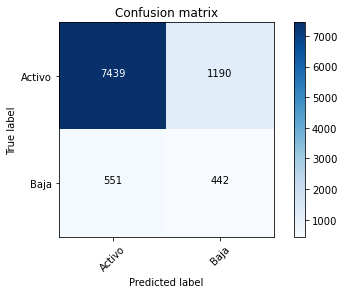

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred ))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

(0.8210009976720984, 0.3520914835991574, 0.6703083688996103)

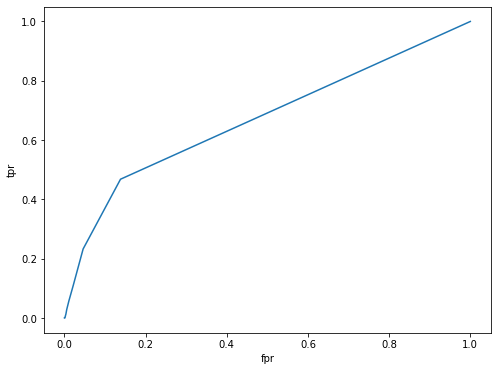

In [38]:
evaluate(classifier, X, y)

Average precision-recall score: 0.18


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.18')

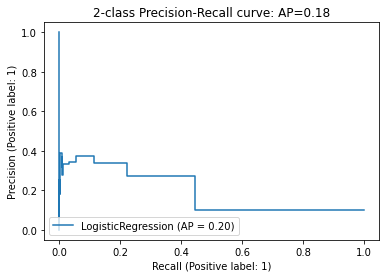

In [41]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

## Enconding con ``get_dummies``

https://www.kaggle.com/loveall/cleaning-visualizing-and-modeling-cold-call-data

In [42]:
data_filtered = data[['Gender', 'Housing Type', 'Labor Situation', 'Marital Status', 'Provincia', 'Nationality',
                      'Quejas', 'Monitoring Status']]
data_filtered.columns

Index(['Gender', 'Housing Type', 'Labor Situation', 'Marital Status',
       'Provincia', 'Nationality', 'Quejas', 'Monitoring Status'],
      dtype='object')

In [43]:
Gender = pd.get_dummies(data = data_filtered['Gender'],prefix = "Gender")
House = pd.get_dummies(data = data_filtered['Housing Type'],prefix = "House")
Labor = pd.get_dummies(data = data_filtered['Labor Situation'],prefix = "Labor")
Marital = pd.get_dummies(data = data_filtered['Marital Status'],prefix = "Marital")
Provincia = pd.get_dummies(data = data_filtered['Provincia'],prefix = "Provincia")
Nationality = pd.get_dummies(data = data_filtered['Nationality'],prefix = "Nationality")

In [44]:
data_filtered.drop(['Gender','Housing Type','Labor Situation','Provincia', 
                    'Nationality', 'Marital Status'],axis=1,inplace=True)

C:\Users\alber\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
dummy_df = pd.concat([data_filtered,Gender,House,Labor,Marital,Provincia,Nationality],axis=1)
dummy_df.columns

Index(['Quejas', 'Monitoring Status', 'Gender_H - HOMBRE', 'Gender_M - MUJER',
       'House_1 - PROPIEDAD SIN HIPOTECA', 'House_2 - PROPIEDAD HIPOTECADA',
       'House_3 - ALQUILER', 'House_4 - FAMILIARES/PADRES',
       'House_5 - EMPRESA', 'Labor_01 ASALARIADO FIJO',
       'Labor_02 ASALARIADO TEMPORAL', 'Labor_03 FUNCIONARIO',
       'Labor_04 AUTONOMO', 'Labor_06 PARADO',
       'Labor_07 PENSIONISTA (JUBILACION)', 'Labor_08 PENSIONISTA (VIUDEDAD)',
       'Labor_09 PENSIONISTA (LARGA ENFERMEDAD)', 'Marital_1 - SOLTERO',
       'Marital_2 - CASADO', 'Marital_3 - VIUDO',
       'Marital_4 - SEPARADO/DIVORCIADO', 'Marital_5 ? PAREJA DE HECHO',
       'Marital_5 â PAREJA DE HECHO', 'Provincia_Alicante',
       'Provincia_Castellon', 'Provincia_Valencia',
       'Nationality_AF - AFRICA MENOS MAGREB',
       'Nationality_AJ - AUSTRALIA Y JAPON',
       'Nationality_AS - ASIA MENOS JAPON', 'Nationality_ES - ESPAÃOLA',
       'Nationality_ES - ESPAÑOLA', 'Nationality_IB - IBEROAMER

In [46]:
dummy_df.head()

,Quejas,Monitoring Status,Gender_H - HOMBRE,Gender_M - MUJER,House_1 - PROPIEDAD SIN HIPOTECA,House_2 - PROPIEDAD HIPOTECADA,House_3 - ALQUILER,House_4 - FAMILIARES/PADRES,House_5 - EMPRESA,Labor_01 ASALARIADO FIJO,Labor_02 ASALARIADO TEMPORAL,Labor_03 FUNCIONARIO,Labor_04 AUTONOMO,Labor_06 PARADO,Labor_07 PENSIONISTA (JUBILACION),Labor_08 PENSIONISTA (VIUDEDAD),Labor_09 PENSIONISTA (LARGA ENFERMEDAD),Marital_1 - SOLTERO,Marital_2 - CASADO,Marital_3 - VIUDO,Marital_4 - SEPARADO/DIVORCIADO,Marital_5 ? PAREJA DE HECHO,Marital_5 â PAREJA DE HECHO,Provincia_Alicante,Provincia_Castellon,Provincia_Valencia,Nationality_AF - AFRICA MENOS MAGREB,Nationality_AJ - AUSTRALIA Y JAPON,Nationality_AS - ASIA MENOS JAPON,Nationality_ES - ESPAÃOLA,Nationality_ES - ESPAÑOLA,Nationality_IB - IBEROAMERICA,Nationality_MA - MAGREB,Nationality_OT - OTROS,Nationality_RE - RESTO DE EUROPA,Nationality_UE - UNION EUROPEA,Nationality_US - USA / CANADA
0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [47]:
X = dummy_df.drop(['Monitoring Status'],axis=1).values
y = dummy_df['Monitoring Status'].values

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Regresión Logística

In [49]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, class_weight="balanced")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.94      0.74      0.83      8629
           1       0.21      0.60      0.31       993

    accuracy                           0.73      9622
   macro avg       0.58      0.67      0.57      9622
weighted avg       0.87      0.73      0.78      9622



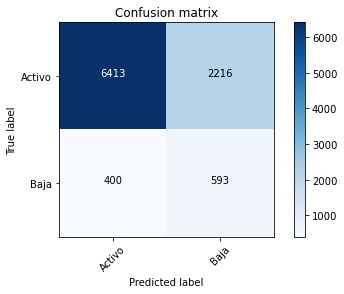

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test,y_pred))
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.7335384103757898, 0.3296381510144321, 0.7502265423441149)

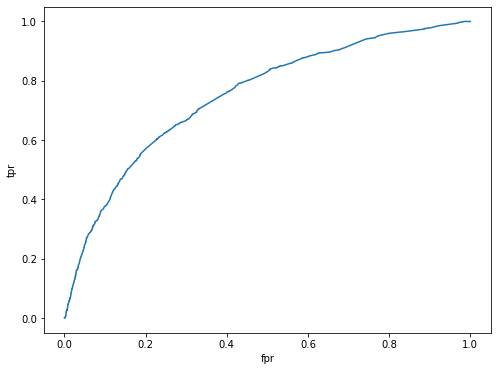

In [51]:
evaluate(classifier, X, y)

Average precision-recall score: 0.17


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.17')

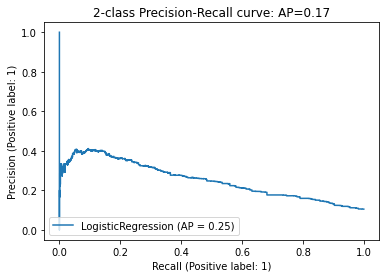

In [52]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
# Don´t do this!!!

from sklearn.model_selection import GridSearchCV

classifier = GridSearchCV(KNeighborsClassifier(),
                      param_grid = {'n_neighbors':np.arange(2,10)},
                      scoring = 'recall')

classifier.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='recall')

In [55]:
classifier.best_params_

{'n_neighbors': 3}

In [56]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:
y_pred = classifier.predict(X_test)

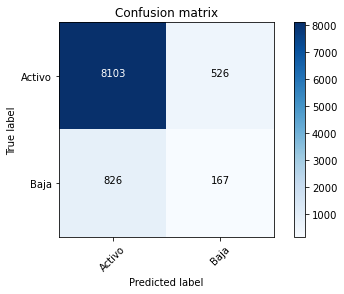

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      8629
           1       0.24      0.17      0.20       993

    accuracy                           0.86      9622
   macro avg       0.57      0.55      0.56      9622
weighted avg       0.84      0.86      0.85      9622



(0.874792151646159, 0.16795580110497238, 0.6097584440639456)

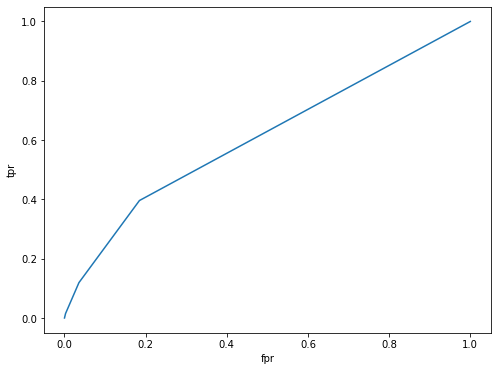

In [60]:
evaluate(classifier, X, y)

Average precision-recall score: 0.13


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.13')

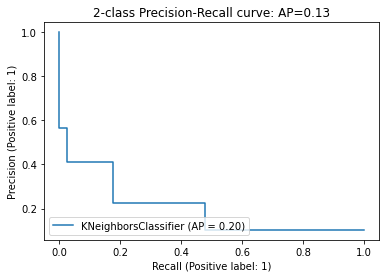

In [61]:
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### Decission Tree Classifier

Decision Tree Accuracy is 0.72
Cross Validation Score = 0.72
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      8629
           1       0.21      0.62      0.32       993

    accuracy                           0.72      9622
   macro avg       0.58      0.68      0.57      9622
weighted avg       0.87      0.72      0.77      9622



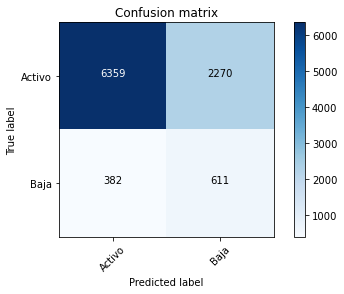

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

DT = DecisionTreeClassifier(random_state = 0,class_weight="balanced", min_weight_fraction_leaf=0.01)
DT = DT.fit(X_train,y_train)
print ("Decision Tree Accuracy is %2.2f" % accuracy_score(y_test, DT.predict(X_test)))

score_DT = cross_val_score(DT, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_DT)

y_pred = DT.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

(0.7138343864316594, 0.32668231611893583, 0.7402516061558152)

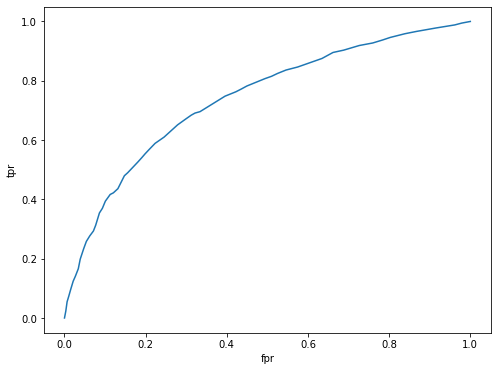

In [63]:
evaluate(DT, X, y)

Average precision-recall score: 0.17


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.17')

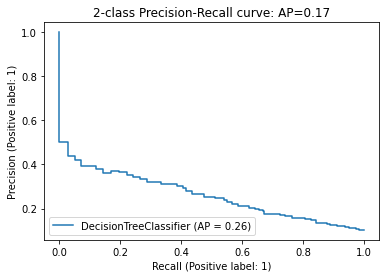

In [64]:
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

disp = plot_precision_recall_curve(DT, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### Random Forest Classifier

Random Forest Accuracy is 0.74
Cross Validation Score = 0.74
              precision    recall  f1-score   support

           0       0.94      0.77      0.84      8629
           1       0.21      0.55      0.31       993

    accuracy                           0.74      9622
   macro avg       0.57      0.66      0.57      9622
weighted avg       0.86      0.74      0.79      9622



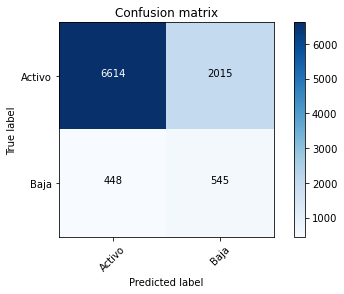

In [65]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=10,class_weight="balanced")
rfc.fit(X_train, y_train)
print ("Random Forest Accuracy is %2.2f" % accuracy_score(y_test, rfc.predict(X_test)))

score_rfc = cross_val_score(rfc, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_rfc)

y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred ))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

(0.7499168606584636, 0.33303769401330374, 0.7220875825681038)

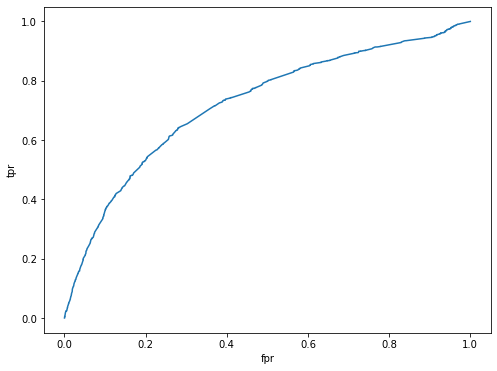

In [66]:
evaluate(rfc, X, y)

Average precision-recall score: 0.16


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.16')

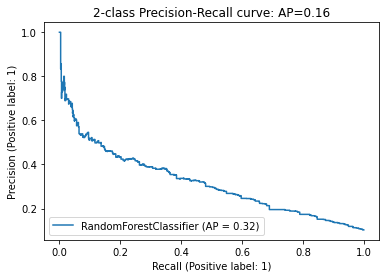

In [67]:
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

disp = plot_precision_recall_curve(rfc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))